In [258]:
#import package we need to use.
import requests
from bs4 import BeautifulSoup 

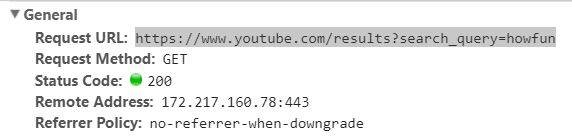
從Google瀏覽器的檢查可以知道取得html要用get方法以及需要的網址

In [259]:
url = 'https://www.youtube.com/results?search_query=howfun'
res = requests.get(url)
#確定可以讀取到網頁
res.status_code

200

In [299]:
soup = BeautifulSoup(res.text, 'html.parser')

In [261]:
#嘗試用不同的find_all方法找出資訊
title = soup.find_all('a', rel="spf-prefetch")
title_list = []
for video in title:
    title_list.append(video.string)
title_list

['三菱Eclipse Cross以我為榮',
 'HowFun / 阿明臉長得很像風箏',
 'HowFun / 把初音納入後宮吧！',
 '《How孩子不要看》芒果冰淇淋 #1 我想當YouTuber啦',
 'HowFun / 奮青，好難。',
 'HowFun / 國軍弟兄們，上戰場囉！',
 '《How孩子不要看》芒果冰淇淋 #1 我想當YouTuber啦',
 'HowFun / 過年送禮，就是戰爭!!!',
 'HowFun / 阿明的作文',
 'HowFun / 先生，你水潑到我鞋子上了。',
 'HowFun / 公主，這是你的襪子嗎？',
 'HowFun / 阿明艦長帶你飛～',
 'Howfun / 叫媽媽，好難。',
 'HowFun / 遊戲，換你抽牌啦！',
 'HowFun / 奮青，好難。',
 'HowFun / HowHowの小廚房之勞工的心聲',
 'HowFun / 你腦袋才裝鉛啦！',
 'HowFun / 走味的二分之一',
 'HowFun / 今天的我，沒有極限！',
 'HowFun / 快點啦！要點什麼啦！',
 'HowFun / 那些年，天堂。',
 'HowFun / 台北！我的主場！feat. 最狂阿伯柯P',
 'HowFun / 直接業配攻擊網友本體',
 'HowFun / 男人就是簡單！直白！']

In [273]:
#最後發現用這個標籤和屬性可以找到每一部影片的資訊
soup.find_all('div','yt-lockup-content')[2].contents

[<h3 class="yt-lockup-title "><a aria-describedby="description-id-982855" class="yt-uix-tile-link yt-ui-ellipsis yt-ui-ellipsis-2 yt-uix-sessionlink spf-link " data-sessionlink="itct=CF4Q3DAYACITCPW7w8T519kCFRWNWAodecAAoSj0JDIMc2VhcmNoLXNoZWxmUgZob3dmdW4" dir="ltr" href="/watch?v=3in3D7y4VK0" rel="spf-prefetch" title="HowFun / 阿明臉長得很像風箏">HowFun / 阿明臉長得很像風箏</a><span class="accessible-description" id="description-id-982855"> - 播放時間：1:05。</span></h3>,
 <div class="yt-lockup-byline "><a class="yt-uix-sessionlink spf-link " data-sessionlink="itct=CF4Q3DAYACITCPW7w8T519kCFRWNWAodecAAoSj0JA" href="/user/jasonjason1124">HowFun</a> <span class="yt-uix-tooltip yt-channel-title-icon-verified yt-sprite" title="已驗證"></span></div>,
 <div class="yt-lockup-meta "><ul class="yt-lockup-meta-info"><li>2 天前</li><li>觀看次數：279,350</li></ul></div>,
 <div class="yt-lockup-description yt-ui-ellipsis yt-ui-ellipsis-2" dir="ltr">啊，真的很像風箏呢。 #NikeReact #任我去跑快訂閱<b>HowFun</b>頻道: <a class="yt-uix-redirect-link" dir="l

In [274]:
#影片Title
soup.find_all('div','yt-lockup-content')[2].contents[0].contents[0].text

'HowFun / 阿明臉長得很像風箏'

In [275]:
#第一個影片撥放時間
soup.find_all('div','yt-lockup-content')[2].contents[0].contents[1].text

' - 播放時間：1:05。'

In [276]:
#第二個影片撥放時間
soup.find_all('div','yt-lockup-content')[3].contents[0].contents[1].text

' - 播放時間：1:30。'

In [277]:
#影片作者
soup.find_all('div','yt-lockup-content')[2].contents[1].contents[0].text

'HowFun'

In [278]:
#上傳時間
soup.find_all('div','yt-lockup-content')[2].contents[2].contents[0].contents[0].text

'2 天前'

In [279]:
#影片觀看次數
soup.find_all('div','yt-lockup-content')[2].contents[2].contents[0].contents[1].text

'觀看次數：279,350'

In [280]:
#影片描述
soup.find_all('div','yt-lockup-content')[2].contents[3].text

'啊，真的很像風箏呢。 #NikeReact #任我去跑快訂閱HowFun頻道: http://goo.gl/tnPtxh HowFun臉書專頁: http://www.facebook.com/'

In [ ]:
#利用正規表達式把時間及觀看數字的數字取出來
import re
RexNum = re.compile('\d:\d\d')
RexNum2 = re.compile('(\d+,)+\d+')

# 作法參考:
info = []
for article in q('.r-ent'):
    info_dict = OrderedDict()
    article_q = pq(article)
    info_dict['title'] = article_q('a').text()
    info_dict['author'] = article_q('.author').text()
    info_dict['push'] = article_q('.hl').text()
    info.append(info_dict)
data = pd.DataFrame(info)
data.to_csv('ptt_food_info.csv' ,encoding = 'utf-8', index=None)
data.head()

In [297]:
#參考之前的作法把資料用pandas的DataFrame格式儲存起來
from collections import OrderedDict
import pandas as pd
info = []
for i in range(2,25):
    part = soup.find_all('div','yt-lockup-content')[i]
    info_dict = OrderedDict()
    info_dict['title'] = part.contents[0].contents[0].text
    info_dict['length'] = re.search(RexNum,part.contents[0].contents[1].text).group()
    info_dict['polish'] = part.contents[2].contents[0].contents[0].text
    info_dict['view'] = re.search(RexNum2,part.contents[2].contents[0].contents[1].text).group()
    info_dict['Text'] = part.contents[3].text
    info.append(info_dict)
data = pd.DataFrame(info)
#這裡encoding要用utf-8-sig用excel開啟才不會是亂碼
data.to_csv('YoutubeSearch_HowFun.csv', encoding='utf-8-sig', index=None)
data.head()

,title,length,polish,view,Text
0,HowFun / 阿明臉長得很像風箏,1:05,2 天前,"279,350",啊，真的很像風箏呢。 #NikeReact #任我去跑快訂閱HowFun頻道: http:/...
1,HowFun / 把初音納入後宮吧！,1:30,3 天前,"295,410",Cosplay初音什麼的... 我...我真的沒有開心喔！ 但觀眾很不開心。 趕快去下載神無...
2,《How孩子不要看》芒果冰淇淋 #1 我想當YouTuber啦,2:56,4 天前,"386,050",HowHowの全新節目， HowFun x 公視青春發言人芒果冰淇淋！！！ 芒果爺爺跟洨恐龍...
3,HowFun / 奮青，好難。,2:58,1 週前,"497,988",奮青就是要為了自己的人生奮鬥！ 夢想什麼的，只要奮鬥一定會縮短我們之間的距離吧！ 學妹「學長...
4,HowFun / 國軍弟兄們，上戰場囉！,3:46,2 個月前,"1,389,531",我想如果真的打仗，應該會變這樣吧。 ㄏ這次直接1人分飾13角呢～ 快訂閱HowFun頻道: ...


# 獲得每個影片的網址(參考)
#獲取每篇文章的網址
url_list = []
for node in q('.title a'):
    url = 'https://www.ptt.cc' + str(pq(node).attr('href'))
    url_list.append(url)
print(url_list)

In [288]:
#嘗試找出一個url
sub_url_test = soup.find_all('div','yt-lockup-content')[2].contents[0].find('a')['href']
url_test = 'https://www.youtube.com' + sub_url
url_test

'https://www.youtube.comhttps://www.youtube.com/watch?v=cruXUtlOdTU'

In [289]:
#找出每個影片的url並存進list裡
url_list = []
for i in range(2,25):
    part = soup.find_all('div','yt-lockup-content')[i]
    url = 'https://www.youtube.com' + part.contents[0].find('a')['href']
    url_list.append(url)
print(url_list)

['https://www.youtube.com/watch?v=3in3D7y4VK0', 'https://www.youtube.com/watch?v=PzpgeZHDMOk', 'https://www.youtube.com/watch?v=Rwa1MgrDAoQ', 'https://www.youtube.com/watch?v=E-2rbKZbXgk', 'https://www.youtube.com/watch?v=zgjtyvQqwVI', 'https://www.youtube.com/watch?v=Rwa1MgrDAoQ', 'https://www.youtube.com/watch?v=VYCGi4b9_YI', 'https://www.youtube.com/watch?v=bt6b7-ZteJY', 'https://www.youtube.com/watch?v=YXb800paJhw', 'https://www.youtube.com/watch?v=CRWh0ze1h20', 'https://www.youtube.com/watch?v=l8QclBn9k7c', 'https://www.youtube.com/watch?v=cene97fTKJQ', 'https://www.youtube.com/watch?v=HM3PnOEJ1jI', 'https://www.youtube.com/watch?v=E-2rbKZbXgk', 'https://www.youtube.com/watch?v=LskMlvoMiD0', 'https://www.youtube.com/watch?v=lIY92X3kxsQ', 'https://www.youtube.com/watch?v=3Cbd_u80iZU', 'https://www.youtube.com/watch?v=htL6Iotw6ns', 'https://www.youtube.com/watch?v=5guSmzeMUWE', 'https://www.youtube.com/watch?v=3aKYtUgmsKE', 'https://www.youtube.com/watch?v=UX4Cp5NuKX4', 'https://www

In [294]:
autoplay_list = []
for sub_url in url_list:
    autoplay_dict = OrderedDict()
    r = requests.get(sub_url)
    s = BeautifulSoup(r.text, 'html.parser').find_all('div','watch-sidebar-section')[0]
    autoplay_dict['title'] = s.find('span','title').text.strip()
    autoplay_dict['length'] = re.search(RexNum,s.find('span','accessible-description').text.strip()).group()
    autoplay_dict['author'] = s.find('span','stat attribution').text
    autoplay_dict['view'] = re.search(RexNum2,s.find('span','stat view-count').text).group()
    autoplay_list.append(autoplay_dict)
data2 = pd.DataFrame(autoplay_list)
#這裡encoding要用utf-8-sig用excel開啟才不會是亂碼
data2.to_csv('HowFun_autoplay.csv', encoding='utf-8-sig', index=None)
data2.head()

,title,length,author,view
0,HowFun / 把初音納入後宮吧！,1:30,HowFun,"296,206"
1,與魯蛇同行【與神同行惡搞版!】,9:27,葉式特工 Yes Ranger,"534,313"
2,夾娃娃機能賺多少錢？一周台主體驗，直接算給你看！【民生調查局#13】,2:53,God Tone Asia 張家兄弟滑起來,"1,402,810"
3,「去你的晚餐」 #展榮展瑞│揭秘HowHow私生活 關懷邊緣人你我都有責,4:13,Keelong and Rays這群人 展榮展瑞,"673,216"
4,HowFun / 三國時期的大兵日記,2:05,HowFun,"1,054,718"


In [298]:
data.insert(1,'autoplay_video',data2['title'])
data

,title,autoplay_video,length,polish,view,Text
0,HowFun / 阿明臉長得很像風箏,HowFun / 把初音納入後宮吧！,1:05,2 天前,"279,350",啊，真的很像風箏呢。 #NikeReact #任我去跑快訂閱HowFun頻道: http:/...
1,HowFun / 把初音納入後宮吧！,與魯蛇同行【與神同行惡搞版!】,1:30,3 天前,"295,410",Cosplay初音什麼的... 我...我真的沒有開心喔！ 但觀眾很不開心。 趕快去下載神無...
2,《How孩子不要看》芒果冰淇淋 #1 我想當YouTuber啦,夾娃娃機能賺多少錢？一周台主體驗，直接算給你看！【民生調查局#13】,2:56,4 天前,"386,050",HowHowの全新節目， HowFun x 公視青春發言人芒果冰淇淋！！！ 芒果爺爺跟洨恐龍...
3,HowFun / 奮青，好難。,「去你的晚餐」 #展榮展瑞│揭秘HowHow私生活 關懷邊緣人你我都有責,2:58,1 週前,"497,988",奮青就是要為了自己的人生奮鬥！ 夢想什麼的，只要奮鬥一定會縮短我們之間的距離吧！ 學妹「學長...
4,HowFun / 國軍弟兄們，上戰場囉！,HowFun / 三國時期的大兵日記,3:46,2 個月前,"1,389,531",我想如果真的打仗，應該會變這樣吧。 ㄏ這次直接1人分飾13角呢～ 快訂閱HowFun頻道: ...
5,《How孩子不要看》芒果冰淇淋 #1 我想當YouTuber啦,夾娃娃機能賺多少錢？一周台主體驗，直接算給你看！【民生調查局#13】,2:56,4 天前,"386,050",HowHowの全新節目， HowFun x 公視青春發言人芒果冰淇淋！！！ 芒果爺爺跟洨恐龍...
6,HowFun / 過年送禮，就是戰爭!!!,HowFun / 國軍弟兄們，上戰場囉！,3:13,1 個月前,"727,568",自從去年過年送禮我送了喜年來蛋捲， 我考試都考一百分！ “阿明，那個，多益滿分是990。” ...
7,HowFun / 阿明的作文,HowFun / 這就是大人的滋味！,1:46,1 個月前,"498,239",小美「老師，阿明作文只寫三行。」 老師「阿明，怎麼只寫三行呢？」 阿明「才沒有！我寫四行好嗎...
8,HowFun / 先生，你水潑到我鞋子上了。,HowFun / 男人就是簡單！直白！,2:44,11 個月前,"2,016,844",史上最強MV，誕生。 唱片業大老看到影片無不痛哭流涕。 好鞋，不買嗎？https://goo...
9,HowFun / 公主，這是你的襪子嗎？,HowFun / 詐光你的尾牙錢 feat. 上班不要看,1:53,1 個月前,"479,962",阿明「真的嗎？穿了Footer襪子，腳就不會臭了嗎？」 Footer「對唷～如果無效，Foo...
